.
.

# MANUAL COBRApy
## ÚLTIMA VERSIÓN 
------------------------------------------------------------------------------------------
.
.
.
#### UNIVERSIDAD AUTÓNOMA METROPOLITANA UNIDAD CUAJIMALPA
.
.
.
#### Mauricio Carrasco González
#### Dr. Roberto Olivares Hernández
.
.
.
.
.



## Introducción


## Instalación


Cobrapy es un paquete de Python que proporciona una interfaz simple para la reconstrucción y el análisis basados en restricciones metabólicas.

El paquete incluye interfaces simples orientadas a objetos para la construcción de modelos (incluida la lectura hacia/desde los formatos sbml, matlab y json) e implementa métodos COBRA de uso común, como análisis de balance de flujo, análisis de variabilidad de flujo y análisis de eliminación de genes.

COBRApy se puede instalar con cualquier instalación reciente de pip. A continuación se muestran las instrucciones para varios sistemas operativos:

Mac OS X o Linux----------------------------------------------

Le recomendamos que cree un entorno virtual Python. Instale COBRApy cuando un entorno esté activo ejecutando el siguiente comando en la terminal:

In [ ]:
pip install cobra

Microsoft Windows-----------------------------------

Puede usar el mismo comando de instalación usando pip o usando Anaconda, puede abrir un shell Anaconda e instalar COBRApy desde el canal de bioconda.

Si desea cargar modelos MATLAB, necesitará dependencias adicionales. Por favor instalar:


In [ ]:
pip install cobra[all]

## Primeros Pasos

Como se abordó anteriormente, Cobrapy es una librería de Python que proporciona una interfaz simple para la reconstrucción y el análisis basados en restricciones metabólicas. Antes de comenzar a trabajar con este paquete es importante tener en mente que Cobrapy trabaja orientado a objetos, que en este contexto serán los elementos que podremos manipular de nuestro modelo. 

Los objetos que podemos utilizar en Cobrapy son: modelos, reacciones, metabolitos y genes. Estos objetos o elementos interaccionarán entre sí mediante sus "atributos" para representar el estado biológico del sistema simulado.

En Cobrapy, como en otras librerías de python, es necesario de importar algunas dependencias que sean necesarias en el espacio de trabajo actual.
Sugerimos que para el buen funcionamiento de scripts usando Cobrapy al menos las siguientes dependencias sean llamadas al inicio del código:

In [ ]:
from __future__ import print_function #dependencia que evitará problemas de versión de sintaxis
import cobra                          #Se llama a la librería de Cobrapy
from cobra import Model, Reaction, Metabolite #Se llama a los objetos que se utilizarán más adelante
from cobra.io import read_sbml_model  #Se llama a la dependencia que permitirá leer modelos metabólicos en formato sbml

### Cargando un modelo

En Cobrapy podemos cargar un modelo metabólico distribuido en la web o construir un nuevo modelo desde cero. También podemos cargar modelos de prueba de Salmonella y de E.coli que vienen instalados con la librería, para esto escribimos: 

In [1]:
from __future__ import print_function

import cobra
import cobra.test

Para crear un modelo de prueba y cargarlo como objeto "modelo" escirbimos:

In [2]:
#"ecoli" y "salmonella" son argumentos también validos
model = cobra.test.create_test_model("textbook")

una vez cargado el modelo, podemos obtener una visualización general de los elementos que lo conforman:

(NOTA: usando Jupyter Notebook la información se despliega tan sencillo como escribir el siguiente comando, en uso de Python de forma iterada, es necesario usar la función print()).
    

In [3]:
model

Name,e_coli_core
Memory address,0x012742da8
Number of metabolites,72
Number of reactions,95
Number of groups,0
Objective expression,1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba
Compartments,"cytosol, extracellular"


El siguiente caso es cargar un modelo SBML en formato XML que tengamos guardado en la misma dirección del archivo script que estamos generando, para esto es necesario inicializar el código llamando las dependencias necesarias:

In [4]:
from __future__ import print_function
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import read_sbml_model  #inicializar la función de lectura de modelos sbml

Los modelos SBML (Systems Biology Markup Language) son modelos de distribución en formato estándar XML que tienen soporte para modelos COBRA a partir de la versión 2 de la extensión FBC.

Para leer un modelo SBML y cargarlo como objeto "modelo" escirbimos la siguientr función teniendo como argumento el nombre del archivo del modelo (para este ejemplo usaremos el modelo a escala genómica de Pichia pastoris descargado de la web):



In [5]:
model = read_sbml_model('MODEL1507180023_url.xml')

In [6]:
model.name #Regresa información del nombre del modelo metabólico

'Chung2010 - Genome-scale metabolic network of Pichia pastoris (iPP668)'

In [7]:
model

Name,MODEL1507180023
Memory address,0x012742e80
Number of metabolites,1178
Number of reactions,1361
Number of groups,0
Objective expression,1.0*BIOMASS - 1.0*BIOMASS_reverse_69053
Compartments,"Cytoplasm, Mitochondria, Extracellular, Glyoxysome, Endoplasmic reticulum, Nucleus, Golgi, Vacuole"


Usando COBRA también podemos escribir modelos en formato .xml de la siguiente manera:


In [ ]:
cobra.io.write_sbml_model(model,"test_model.xml")

## Construcción de modelo


Las clases principales de COBRApy son Modelo, Metabolito, Reacción y Gen. El Modelo sirve como contenedor para un conjunto de reacciones químicas, incluidos los metabolitos y productos genéticos asociados. Para la construcción de un modelo desde cero primero debemos crear un objeto "modelo" y asignarle un nombre:

In [2]:
from __future__ import print_function
import cobra
from cobra import Model, Reaction, Metabolite

model = Model('example_model') ##Definimos un modelo con un nombre


Después creamos una reacción. Para este ejemplo, seguiremos la ecuación de la reacción 3OAS140 del modelo STM_1.0: 

1.0 malACP[c] + 1.0 h[c] + 1.0 ddcaACP[c]→1.0 co2[c] + 1.0 ACP[c] + 1.0 3omrsACP[c]

Usaremos el identificador de la reacción con la función Reaction(), asignaremos un nombre usando la función reaction.name, y agregaremos información del subsistema con reaction.subsystem. El sentido de la reacción la configuramos con los límites asignados reaction.lower_bound = 0 y reaction.upper_bound = 1000, para el caso de reacciones reversibles, ambos valores son iguales a 1000.

In [3]:
reaction = Reaction('3OAS140')
reaction.name = '3 oxoacyl acyl carrier protein synthase n C140 '
reaction.subsystem = 'Cell Envelope Biosynthesis'
reaction.lower_bound = 0.# This is the default
reaction.upper_bound = 1000.# This is the default

El siguiente paso es crear los metabolitos que se usarán en la reacción química. Podemos asignar un identificador de metabolito, formula, nombre y ubicación en el compartimento. 

In [4]:
ACP_c = Metabolite(
    'ACP_c',
    formula='C11H21N2O7PRS',
    name='acyl-carrier-protein',
    compartment='c')
omrsACP_c = Metabolite(
    '3omrsACP_c',
    formula='C25H45N2O9PRS',
    name='3-Oxotetradecanoyl-acyl-carrier-protein',
    compartment='c')
co2_c = Metabolite(
    'co2_c', 
    formula='CO2', 
    name='CO2', 
    compartment='c')
malACP_c = Metabolite(
    'malACP_c',
    formula='C14H22N2O10PRS',
    name='Malonyl-acyl-carrier-protein',
    compartment='c')
h_c = Metabolite(
    'h_c', 
    formula='H', 
    name='H', 
    compartment='c')
ddcaACP_c = Metabolite(
    'ddcaACP_c',
    formula='C23H43N2O8PRS',
    name='Dodecanoyl-ACP-n-C120ACP',
    compartment='c')


Una vez creados los metabolitos, se deben añadir a la reacción haciendo uso del tipo Diccionario que COBRA utiliza para las reacciones usando la función reaction.add.metabolites(). Los valores son negativos para los reactivos y positivos para los productos:


In [5]:
reaction.add_metabolites({
    malACP_c: -1.0,
    h_c: -1.0,
    ddcaACP_c: -1.0,
    co2_c: 1.0,
    ACP_c: 1.0,
    omrsACP_c: 1.0
})

Para asegurarnos que la información se enlazó correctamente podemos llamar a la nueva reacción con la siguiente función, la cual nos devolverá una cadena de carácteres con la representación de la ecuación:

In [6]:
reaction.reaction

'ddcaACP_c + h_c + malACP_c --> 3omrsACP_c + ACP_c + co2_c'

Los requisitos genéticos subyacentes para que una reacción sea activa en un modelo se proporcionan como una relación booleana, donde cada gen se denomina mediante un identificador único. Para asignar un par de genes a la nueva reacción, usamos la función reaction.gene_reaction_rule y le asignamos los identificadores STM2378 y STM1197.

In [8]:
reaction.gene_reaction_rule = '( STM2378 or STM1197 )'
reaction.genes  #este comando nos muestra ubicación en memoria de los genes creados

frozenset({<Gene STM1197 at 0x12756640>, <Gene STM2378 at 0x12756628>})

En este punto se han creado un modelo, una reacción, 6 metabolitos y dos genes, sin embargo estos objetos no han sido asociados y por lo tanto no aparecen guardados en el modelo:

In [9]:
len(model.reactions) #este comando despliega el número de reacciones asociadas al modelo

0

In [10]:
len(model.metabolites) #este comando despliega el número de metabolitos asociadas al modelo

0

In [11]:
len(model.genes) #este comando despliega el número de genes asociadas al modelo

0

Para agregar la reacción creada al modelo (la cual tambien agregará todos los metabolitos y genes asociados) usaremos el siguiente comando:

In [12]:
model.add_reactions([reaction])

Ahora podemos observar que el modelo contiene nuevos objetos asociados:

In [15]:
print('%i reaction' % len(model.reactions))
print('%i metabolites' % len(model.metabolites))
print('%i genes' % len(model.genes))

1 reaction
6 metabolites
2 genes


Este procedimiento debe realizarse de manera iterada para las diferentes reacciones que se quisieran agregar al nuevo modelo creado.

Por último, es necesario configurar el objetivo del modelo. En este caso vamos a maximizar el flujo de la única reacción que hemos creado. Para configurar la reacción objetivo asignaremos el identificador de la reacción a la propiedad objetivo del modelo usando la función model.objective:

In [16]:
model.objective = '3OAS140'

Para inspeccionar la expresión algebraica que el modelo a asignado usando la reacción seleccionada, usamos el siguiente comando:

In [17]:
print(model.objective.expression)

1.0*3OAS140 - 1.0*3OAS140_reverse_65ddc


Para inspeccionar la dirección que el Solver utilizará para la optimización usamos:

In [18]:
print(model.objective.direction)

max


Que indica que el solver resolverá el problema de optimización maximizando el flujo de la reacción seleccionada.

## Que hay dentro del modelo

Para inspeccionar el contenido de un modelo cargado en memoria, basta con imprimir en pantalla el número de reacciones, metabolitos y genes en el modelo como se muestra a continuación:


In [2]:
from __future__ import print_function
import cobra
import cobra.test

model = cobra.test.create_test_model("textbook")
#textbook es el modelo de ejemplo que viene con COBRApy

print(len(model.reactions))  #muestra el número de reacciones
print(len(model.metabolites))  #muestra el número de metabolitos
print(len(model.genes))  #muestra el número de genes

95
72
137


También se puede hacer uso de código iterativo para desplegar toda la información de cada uno de los elementos del modelo. Por ejemplo, con el siguiente script se puede conseguir una lista con todas las reacciones, metabolitos y genes contenidos en el modelo:

In [23]:
# Iterar a través de los objetos en el modelo:
print("Reactions")
print("---------")
for x in model.reactions:
    print("%s:%s" % (x.id, x.reaction))

print("")
print("Metabolites")
print("-----------")
for x in model.metabolites:
    print('%9s:%s' % (x.id, x.formula))

print("")
print("Genes")
print("-----")
for x in model.genes:
        associated_ids = (i.id for i in x.reactions)
        print("%sis associated with reactions:%s" %
              (x.id, "{" + ", ".join(associated_ids) + "}"))

Reactions
---------
ACALD:acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
ACALDt:acald_e <=> acald_c
ACKr:ac_c + atp_c <=> actp_c + adp_c
ACONTa:cit_c <=> acon_C_c + h2o_c
ACONTb:acon_C_c + h2o_c <=> icit_c
ACt2r:ac_e + h_e <=> ac_c + h_c
ADK1:amp_c + atp_c <=> 2.0 adp_c
AKGDH:akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
AKGt2r:akg_e + h_e <=> akg_c + h_c
ALCD2x:etoh_c + nad_c <=> acald_c + h_c + nadh_c
ATPM:atp_c + h2o_c --> adp_c + h_c + pi_c
ATPS4r:adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
Biomass_Ecoli_core:1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
CO2t:co2_e <=> co2_c
CS:accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c
CYTBD:2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 2

Debido a que los objetos en COBRApy son un tipo especial de Diccionario, estos se pueden recuperar mediante el indice, poniendo entre corchetes [ ] el enésimo elemento en la lista. Por ejemplo, para obtener la quinta reacción en el modelo usamos el siguiente comando (en el índice es 4 debido a que se indexa el 0 como primer elemento):

In [24]:
model.reactions[4] #Recupera la información de la quinta reacción indexada

Reaction identifier,ACONTb
Name,"aconitase (half-reaction B, Isocitrate hydro-lyase)"
Memory address,0x013b1c298
Stoichiometry,acon_C_c + h2o_c <=> icit_c cis-Aconitate + H2O <=> Isocitrate
GPR,b0118 or b1276
Lower bound,-1000.0
Upper bound,1000.0


In [25]:
model.metabolites[9] #Recupera la información del décimo metabolito indexado

Metabolite identifier,accoa_c
Name,Acetyl-CoA
Memory address,0x012b0be68
Formula,C23H34N7O17P3S
Compartment,c
In 7 reaction(s),"ACALD, PDH, CS, PTAr, MALS, PFL, Biomass_Ecoli_core"


In [26]:
model.genes[6]  #Recupera la información del séptimo gen indexado

Gene identifier,b1276
Name,acnA
Memory address,0x013b104a8
Functional,True
In 2 reaction(s),"ACONTb, ACONTa"


Si se cuenta con el identificador, tambien se puede recuperar información mediante el comando get_by_id de la siguiente manera:

In [27]:
model.metabolites.get_by_id("atp_c") #Recupera información del metabolito por identificador

Metabolite identifier,atp_c
Name,ATP
Memory address,0x012b0bc70
Formula,C10H12N5O13P3
Compartment,c
In 13 reaction(s),"ADK1, ATPS4r, PPS, PYK, SUCOAS, PFK, GLNS, GLNabc, ACKr, ATPM, PPCK, PGK, Biomass_Ecoli_core"


In [28]:
model.reactions.get_by_id("ACONTb") #Recupera información de la reacción por identificador

Reaction identifier,ACONTb
Name,"aconitase (half-reaction B, Isocitrate hydro-lyase)"
Memory address,0x013b1c298
Stoichiometry,acon_C_c + h2o_c <=> icit_c cis-Aconitate + H2O <=> Isocitrate
GPR,b0118 or b1276
Lower bound,-1000.0
Upper bound,1000.0


In [30]:
model.genes.get_by_id("b1276") #Recupera información del gen por identificador

Gene identifier,b1276
Name,acnA
Memory address,0x013b104a8
Functional,True
In 2 reaction(s),"ACONTb, ACONTa"


### Compartimentos

Los metabolitos estan asociados a compartimentos dentro de la célula, dependiendo de la construcción y de la escala del modelo se presentarán o no ciertos compartimentos. Para inspeccionar los compartimentos en un modelo se usa el siguiente comando:

In [31]:
model.compartments  #muestra los compartimentos usados en el modelo y sus abreviaciones

{'c': 'cytosol', 'e': 'extracellular'}

Se puede saber el compartimento asociado a un metabolito, por ejemplo para Acetyl-CoA, usando el siguiente comando: 

In [32]:
model.metabolites.accoa_c.compartment #Despliega la abreviatura del compartimento donde se ubica Acetyl-CoA 

'c'

### Metabolitos

Además de la lista iterada de todos los metabolitos en el modelo, también se puede accesar a un grupo de elementos continuos dentro de la lista. Por ejemplo, a continuación se muestra una lista con los primeros diez metabolitos indexados al modelo:

In [33]:
model.metabolites[0:10]

[<Metabolite 13dpg_c at 0x12b0bbc8>,
 <Metabolite 2pg_c at 0x12b0bbb0>,
 <Metabolite 3pg_c at 0x12b0bc88>,
 <Metabolite 6pgc_c at 0x12b0bd18>,
 <Metabolite 6pgl_c at 0x12b0bd90>,
 <Metabolite ac_c at 0x12b0bdc0>,
 <Metabolite ac_e at 0x12b0bdf0>,
 <Metabolite acald_c at 0x12b0be38>,
 <Metabolite acald_e at 0x12b0be50>,
 <Metabolite accoa_c at 0x12b0be68>]

Se puede accesar a la información de un metabolito especifico usando la notación de puntos conociendo el identificador del elemento, la lista desplegada proporcionará el nombre completo del metabolito, ubicación en memoria, formula molecular, compartimento y reacciones asociadas en el modelo:

**No se puede usar esta notación para acceder a metabolitos, genes o reacciones si los identificadores no se parecen a los nombres de variables adecuados de python. En este caso se puede usar el comando get_by_id

In [34]:
model.metabolites.g3p_c  #Recuperar información de un metabolito mediante identificador

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x012b21400
Formula,C3H5O6P
Compartment,c
In 7 reaction(s),"TALA, TKT1, TKT2, FBA, TPI, GAPD, Biomass_Ecoli_core"


El nombre completo del metabolito puede estar disponible con el atributo .name 

In [37]:
model.metabolites.g3p_c.name  #Se muestra el nombre completo del metabolito

'Glyceraldehyde 3-phosphate'

La formula molecular se muestra con el atributo .formula

In [39]:
model.metabolites.g3p_c.formula #Se muestra la formula molecular del metabolito

'C3H5O6P'

Para mostrar una representación en diccionario de la formula se usa el atributo .elements

In [40]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

El peso molecular del metabolito se muestra con el atributo .formula_weight

In [41]:
model.metabolites.g3p_c.formula_weight

168.041961

Para conocer la carga de la molécula en nuestro modelo, usamos el atributo .charge

In [47]:
model.metabolites.g3p_c.charge

-2

Para mostrar las reacciones en las que participa un metabolito, basta con usar el atributo .reactions

In [42]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction Biomass_Ecoli_core at 0x13b1cfe8>,
           <Reaction FBA at 0x13b3c670>,
           <Reaction GAPD at 0x13b3cdc0>,
           <Reaction TALA at 0x13b63da8>,
           <Reaction TKT1 at 0x13b71730>,
           <Reaction TKT2 at 0x13b63c40>,
           <Reaction TPI at 0x13b7daa8>})

En algunas ocaciones, los modelos cuentan con información adicional (como referencias a bases de datos externas o identificadores) que pueden ser mostradas con el atributo .annotation

In [43]:
model.metabolites.g3p_c.annotation

{'bigg.metabolite': 'g3p',
 'cas': ['142-10-9'],
 'chebi': ['CHEBI:17138', 'CHEBI:14333', 'CHEBI:5446', 'CHEBI:58027'],
 'hmdb': 'HMDB01112',
 'kegg.compound': ['C00661', 'C00118'],
 'pubchem.substance': '3930',
 'seed.compound': 'cpd00102',
 'unipathway.compound': ['UPC00661', 'UPC00118']}

### Reacciones

Para mostrar las primeras 10 reacciones del modelo usamos el siguiente comando:

In [48]:
model.reactions[0:10]

[<Reaction ACALD at 0x13b10400>,
 <Reaction ACALDt at 0x13b1c028>,
 <Reaction ACKr at 0x13b1c538>,
 <Reaction ACONTa at 0x13b1c4d8>,
 <Reaction ACONTb at 0x13b1c298>,
 <Reaction ACt2r at 0x13b1c5b0>,
 <Reaction ADK1 at 0x13b1c688>,
 <Reaction AKGDH at 0x13b1c880>,
 <Reaction AKGt2r at 0x13b1c7c0>,
 <Reaction ALCD2x at 0x13b1cbf8>]

Podemos ver la ecuación de una reacción dada usando la notación de puntos con el atributo .name (para el siguiente ejemplo usando el identificador de la primera reacción indexada):

In [53]:
model.reactions.ACALD.reaction

'acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c'

Para devolver el nombre de una reacción usando su identificador, podemos hacer uso del atributo .name como se muestra a continuación para la reacción ACALD:

In [54]:
model.reactions.ACALD.name

'acetaldehyde dehydrogenase (acetylating)'

En el caso de necesitar la información de las reacciones asociadas a un metabolito específico podemos apoyarnos de una iteración como la mostrada a continuación. En este ejemplo nos acercaremos a las reacciones vinculadas al Gliceraldehído-3-fosfato (g3p).

In [49]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction, reaction.name)

TALA: g3p_c + s7p_c <=> e4p_c + f6p_c transaldolase
TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c transketolase
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c transketolase
FBA: fdp_c <=> dhap_c + g3p_c fructose-bisphosphate aldolase
TPI: dhap_c <=> g3p_c triose-phosphate isomerase
GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c glyceraldehyde-3-phosphate dehydrogenase
Biomass_Ecoli_core: 1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c Biomass Objective Function with GAM


En el contexto de modelos metabólicos, las reacciones añaden restricciones al modelo definidas por los limites superior e inferior, las cuales pueden definirse como los valores limitantes que pueden ser tomados. Para ver los límites configurados para una reacción usamos los siguentes comandos:

In [63]:
print(model.reactions.GAPD.lower_bound) #imprime el límite inferior de la reacción
print(model.reactions.GAPD.upper_bound) #imprime el límite superior de la reacción

-1000.0
1000.0


En el ejemplo anterior observamos que ambos límites son diferentes de cero, lo que nos indica que la reacción presenta reversibilidad, y la reacción puede dirigirse hacia ambos sentidos. Para comprobar la reversibilidad de una reacción podemos usar el atributo .reversibility

In [64]:
model.reactions.GAPD.reversibility #Comando de prueba para reversibilidad, devuelve un valor booleano

True

### Genes

Los modelos en COBRApy tambien contienen genes y estos pertenecen a las reacciones asociadas. Para mostrar una lista con los primeros 10 genes indexados al modelo, usamos:

In [65]:
model.genes[0:10]

[<Gene b1241 at 0x13b103e8>,
 <Gene b0351 at 0x13b10058>,
 <Gene s0001 at 0x13b10040>,
 <Gene b3115 at 0x13b103d0>,
 <Gene b1849 at 0x13b103b8>,
 <Gene b2296 at 0x13b10028>,
 <Gene b1276 at 0x13b104a8>,
 <Gene b0118 at 0x13b10490>,
 <Gene b0474 at 0x13b104f0>,
 <Gene b0116 at 0x13b10388>]

Como se mencionó, los genes pertenecen a las reacciones, por lo tanto podemos devolver el identificador de las reacciones a las que estan asociados dichos genes. a continucación se presenta el ejemplo para el primer gen mostrado (b1241):

In [66]:
model.genes.b1241.reactions

frozenset({<Reaction ACALD at 0x13b10400>, <Reaction ALCD2x at 0x13b1cbf8>})

Este gen está asociado a dos reacciones, ACALD y ALCD2x. Para saber el número de genes a los que está asociado una reacción, por ejemplo ACALD, usamos el siguiente atributo:

In [76]:
model.reactions.ACALD.gene_reaction_rule #Devuelve los identificadores de los genes asociados a la reacción

'b0351 or b1241'

En algunos casos, una reacción está asociada a solo un gen, y en otros casos, la reacción puede estar asociada a mas de uno. En el caso de ACALD parece estar asociado a dos isoenzimas. El siguiente comando devuelve el nombre de los genes en vez del identificador: 

In [77]:
model.reactions.ACALD.gene_name_reaction_rule #Devuelve los nombres de los genes asociados a la reacción

'mhpF or adhE'

Es muy importante saber que las reacciones solo serán funcionales si todos los genes son funcionales y siguen las reglas booleanas. Para saber el estado de un gen en un modelo usamos el atributo .functional:

In [78]:
print(model.genes.b0351.functional, model.genes.b1241.functional) #Devuelve el valor booleano del estado de los genes

True True


In [79]:
print(model.reactions.ACALD.functional) #Devuelve el valor booleano del estado funcional de la reacción

True


Si eliminamos (knock out) una de las isoenzimas, la reacción de ACALD permanece funcional, pero no si eliminamos ambas.

In [80]:
model_copy = model.copy()  #Se crea un modelo copia para no alterar al modelo originar con la función model.copy()
model_copy.genes.b0351.knock_out() #con la función knock_out() eliminamos uno de los genes
print(model_copy.reactions.ACALD.functional) #Se evalua si la reacción sigue siendo funcional al eliminar dicho gen

model_copy = model.copy() 
model_copy.genes.b0351.knock_out()
model_copy.genes.b1241.knock_out()
print(model_copy.reactions.ACALD.functional) #Se evalua si la reacción sigue siendo funcional al eliminar ambos genes

True
False


El método anterior para evaluar la deleción de genes puede ser usado para no alterar el modelo original al usar un modelo copia. Otra forma de evaluar los genes y la funcionalidad de las reacciones asociadas es mediante la función delete_model_genes, la cual evaluará los genes activos y configurará los límites de la reacción. La función puede preservar deleciones existentes o reiniciarlas usando la bandera cumulative_flag (True para acumular deleciones).

In [89]:
cobra.manipulation.delete_model_genes(model,["b0351"], cumulative_deletions=True)
print("after 1 KO:%4d< flux_ACALD <%4d" % (model.reactions.ACALD.lower_bound, model.reactions.ACALD.upper_bound))

cobra.manipulation.delete_model_genes(model, ["b1241"], cumulative_deletions=True)
print("after 2 KO:%4d< flux_ACALD <%4d" % (model.reactions.ACALD.lower_bound, model.reactions.ACALD.upper_bound))

after 1 KO:-1000< flux_ACALD <1000
after 2 KO:   0< flux_ACALD <   0


Para reiniciar las deleciones hechas en el modelo, podemos usar el comando undelete_model_genes, con lo cual los genes eliminados pueden reestablecerse.

In [88]:
cobra.manipulation.undelete_model_genes(model)
print(model.reactions.ACALD.lower_bound, "< ACALD <", model.reactions.ACALD.upper_bound)

-1000.0 < ACALD < 1000.0


### Función Objetivo

El modelo está construido en el contexto de los problemas de optimización, por lo tanto es importante definir la función objetivo del sistema, el cual pertenece a cualquiera de la lista de reacciones indexadas en el modelo. Para conocer el objetivo configurado por defecto, podemos utilizar el siguiente comando:

In [3]:
print(model.objective)

Maximize
1.0*Biomass_Ecoli_core - 1.0*Biomass_Ecoli_core_reverse_2cdba


Lo anterior muestra que el flujo de la función objetivo está configurado para ser maximizado. También se muestra la ecuación que el Solver de COBRApy utilizará para encontrar la solución al problema de optimización.

Para configurar una reacción diferente como objetivo, podemos hacer uso del atributo .objective. A continuación cambiaremos el objetivo de biomasa a la reacción ACALD:

In [5]:
model.objective = 'ACALD'
print(model.objective)

Maximize
1.0*ACALD - 1.0*ACALD_reverse_fda2b


## Simulaciones con COBRApy

### Simulaciones de Análisis de Balances de Flujos (FBA)

Una de las caracteristicas principales de COBRA Python es su capacidad para realizar simulaciones en el contexto del Análisis de Balance de Flujos o FBA (Flux Balance Analysis). El solver de COBRApy  puede resolver el problema de optimización tan sencillo como usar la función model.optimize() la cual puede maximizar o minimizar el flujo de la reacción seleccionada como objetivo (maximizando por defecto). La función model.optimize() devolverá como objeto la solución al flujo objetivo, que tendrá muchos atributos, como por ejemplo el valor objetivo, el status de la simulación (esto es, si la solución es optima o no factible), o una lista de flujos para todas las reacciones.

In [7]:
from __future__ import print_function
import cobra
import cobra.test

model = cobra.test.create_test_model("textbook")

solution = model.optimize()  #Guarda una variable con el valor de la función objetivo
print(solution)

<Solution 0.874 at 0x1391fd00>


Algunas veces no se podrá encontrar una solución para la configuración del modelo, por ejemplo, al configurar el límite inferior de una reacción con un valor muy alto que el Solver no pueda resolver. En ese caso se mostrará un mensaje de alerta al intentar optimizar el modelo.

In [9]:
infeasible_model = model.copy()
infeasible_model.reactions.Biomass_Ecoli_core.lower_bound = 100000
infeasible_model.optimize()

cobra\util\solver.py:416 UserWarning: solver status is 'infeasible'


<Solution infeasible at 0x13ceec88>

Aunque la velocidad de resolución del problema de optimización usando los solvers matematicos de COBRApy es muy rápida, se pueden obtener resultados todavía más rápidos si solo se necesita del valor de flujo de una reacción específica o del valor objetivo, es este caso podemos apoyarnos del comando model.slim_optimize:

In [10]:
%%time   #Use este comando para registrar el tiempo de reloj del proceso
solution = model.optimize()
solution.fluxes['ATPM']

Wall time: 22.1 ms


8.39

In [11]:
%%time
model.slim_optimize()  #Este comando calculará el flujo dado de manera más rápida
model.reactions.ATPM.flux

Wall time: 0 ns


8.39

### El problema matemático

¿Cómo resuelve el Solver de COBRApy el problema de optimización en los modelos metabólicos? El Solver puede calcular los flujos de las reacciones usando nuestro modelo como un problema matemático. Ahí, los flujos a través de las reacciones se convierten en variables y los metabolitos se convierten en restricciones. Al asumir que los flujos que entran y salen del sistema deben sumar cero (estado estacionario) podemos calcular los posibles valores de flujo para todas las reacciones (distribución de flujos) si es que el modelo es factible. Para inspeccionar la ecuación matemática completa, usamos el siguiente comando:

In [12]:
print(str(model.solver)[0:1550])

\* Problem: Unknown *\

Maximize
 obj: + Biomass_Ecoli_core - Biomass_Ecoli_core_reverse_2cdba

Subject To
 r_1: - PGK_reverse_02696 + PGK - GAPD_reverse_459c1 + GAPD = 0
 r_2: + PGM_reverse_fc9af - PGM + ENO_reverse_40eea - ENO = 0
 r_3: - PGM_reverse_fc9af + PGM + PGK_reverse_02696 - PGK
 + 1.496 Biomass_Ecoli_core_reverse_2cdba - 1.496 Biomass_Ecoli_core = 0
 r_4: - PGL_reverse_2bb6b + PGL + GND_reverse_eec5c - GND = 0
 r_5: + PGL_reverse_2bb6b - PGL - G6PDH2r_reverse_19ddf + G6PDH2r = 0
 ac_c: - ACt2r_reverse_64e05 + ACt2r + ACKr_reverse_b49c0 - ACKr = 0
 ac_e: + EX_ac_e_reverse_0be96 - EX_ac_e + ACt2r_reverse_64e05 - ACt2r
 = 0
 acald_c: - ALCD2x_reverse_5d107 + ALCD2x - ACALDt_reverse_858fa
 + ACALDt + ACALD_reverse_fda2b - ACALD = 0
 acald_e: + EX_acald_e_reverse_c096e - EX_acald_e + ACALDt_reverse_858fa
 - ACALDt = 0
 accoa_c: + PTAr_reverse_fce15 - PTAr - PFL_reverse_af9ec + PFL
 - PDH_reverse_ca160 + PDH + MALS_reverse_d7382 - MALS
 + CS_reverse_8d7e9 - CS + 3.7478 Biomass_Ec

Debido a que COBRApy utilizará Solvers matemáticos dedicados y optlang para hacer el trabajo duro por nosotros, afortunadamente no tenemos que preocuparnos mucho por la dinámica de esto, sin embargo puede ser bueno conocer la separación entre el modelo metabólico y el problema matemático.

In [14]:
print(len(model.variables))
print(len(model.constraints))

190
72


### La matriz estequiométrica S

La matriz estequiométrica S es la representación del conjunto de metabolitos (filas) entrando y saliendo en el listado de reacciones químicas que conforman al modelo metabólico (columnas). Los valores iguales a cero corresponden a los metabolitos que no están activos en esa reacción y los valores diferentes a cero corresponden al valor estequiométrico de dicho metabolito. La matriz estequiométrica S es importante para resolver el problema de optimización debido a que otorga una carga de restricciones al modelo. 

In [15]:
from cobra.util import create_stoichiometric_matrix

stoich_matrix = create_stoichiometric_matrix(model)
stoich_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1., -1.,  0.]])

A continuación se muestra como se vería la matriz estequiométrica S cuando se visualiza como una grafica de puntos:

**Nota: solo funciona en Jupiter Notebook o en un editor con capacidad gráfica, terminales no.

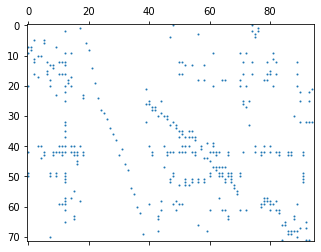

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(stoich_matrix, precision=0.01, markersize=.9)

### Analizando soluciones de FBA

Los modelos resueltos con FBA pueden ser analizados más a fondo mediante los métodos de resumen.

El resumen del modelo (una vez resuleto con FBA) usando la función model.summary() desplegará información del comportamiento del modelo a la entrada y a la salida (flujos de entrada y salida) así como el objetivo optimizado:

In [21]:
model.summary()

Tambien podemos obtener información resumida de un metabolito dado usando el comando model.metabolites.-nombre_del_metabolito-.summary(). Esto es muy útil para, por ejemplo, conocer el balance REDOX de un modelo inspeccionando el cofactor NADH:

In [22]:
model.metabolites.nadh_c.summary()

O para tener un vistazo de las reacciones principales que consumen y producen energía inspeccionando al ATP:

In [24]:
model.metabolites.atp_c.summary()

Para desplegar la distribución de flujos de todas las reacciones (Vi) podemos ayudarnos del comando solution.fluxes:

In [25]:
print(solution.fluxes)

ACALD     0.000000
ACALDt    0.000000
ACKr      0.000000
ACONTa    6.007250
ACONTb    6.007250
            ...   
TALA      1.496984
THD2      0.000000
TKT1      1.496984
TKT2      1.181498
TPI       7.477382
Name: fluxes, Length: 95, dtype: float64


### Simulaciones de Análisis de Balances de Flujo Parsimonioso (pFBA)

El Análisis de Balance de Flujo Parsimonioso es una variante del FBA regular que tiene más restricciones añadidas al problema de optmización, específicamente en esta versión se minimiza la suma total de los valores de flujo absoluto. Dado que esto por sí solo conduciría a la solución trivial de todos los flujos iguales a cero, otra restricción que tiene el problema es que el valor del objetivo original debe ser una fracción de su solución en FBA. Para información más detallada, por favor revise Lewis et al. (2010):


In [1]:
from __future__ import print_function
import cobra
import cobra.test
from cobra.flux_analysis import pfba

model = cobra.test.create_test_model("textbook")

fba_solution = model.optimize()
pfba_solution = pfba(model, fraction_of_optimum=0.95)


Una vez guardado las soluciones dentro de sus respectivas variables, podemos pedir que se muestre el valor solución y la suma de los flujos para cada resultado:

In [2]:
print(fba_solution.fluxes.Biomass_Ecoli_core)
print(fba_solution.fluxes.abs().sum())

0.8739215069684307
518.4220855176072


In [3]:
print(pfba_solution.fluxes.Biomass_Ecoli_core)
print(pfba_solution.fluxes.abs().sum())

0.8302254316200092
493.4400256861709


### Simulaciones de Análisis de Variabilidad de Flujo (FVA)

Este tipo de análisis calcula y muestra todos los flujos máximos y mínimos posibles para todas las reacciones en el valor óptimo de la reacción objetivo:

In [10]:
from __future__ import print_function
import cobra
import cobra.test
import escher 
from escher import Builder
from cobra.flux_analysis import flux_variability_analysis

model = cobra.test.create_test_model("textbook")

result = flux_variability_analysis(model)

para inspeccionar  el resultado:

In [11]:
result

,minimum,maximum
ACALD,8.656583e-14,0.000000e+00
ACALDt,8.656583e-14,0.000000e+00
ACKr,1.617709e-13,3.192215e-14
ACONTa,6.007250e+00,6.007250e+00
ACONTb,6.007250e+00,6.007250e+00
...,...,...
TALA,1.496984e+00,1.496984e+00
THD2,0.000000e+00,-1.845898e-12
TKT1,1.496984e+00,1.496984e+00
TKT2,1.181498e+00,1.181498e+00


Para obtener una vista de la estadística principal de los rangos de flujos resultantes:

In [12]:
result.describe()

,minimum,maximum
count,9.500000e+01,9.500000e+01
mean,2.627753e+00,2.357377e+01
std,1.069810e+01,1.439744e+02
min,-2.917583e+01,-2.917583e+01
25%,0.000000e+00,-5.843193e-13
50%,6.150730e-14,0.000000e+00
75%,4.959985e+00,5.012180e+00
max,4.551401e+01,1.000000e+03


Podemos usar la libreria Escher (ver apartado específico) para visualizar los rangos de flujos en un mapa de vías del metabolismo del carbono central de E. coli:

In [16]:
abs_flux_ranges = abs(result.maximum - result.minimum).to_dict()
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
    reaction_data=abs_flux_ranges)

In [17]:
builder

Builder(reaction_data={'ACALD': 8.656582653259075e-14, 'ACALDt': 8.656582653259074e-14, 'ACKr': 1.298487397988…

El FVA regular puede contener ciclos (loops, por ejemplo, con valores altos de flujos que solo pueden ser asi de altos si se les permite, algo que no puede pasar in vivo) Las reacciones resultadas en rojo son ciclos inútiles, los cuales se pueden evadir con el argumento loopless. Podemos ver que las reacciones que participan en loops son FRD7 y SUCDi:

In [18]:
result[result.maximum > 500]

,minimum,maximum
FRD7,0.000000,994.935624
SUCDi,5.064376,1000.000000


In [20]:
loop_reactions = [model.reactions.FRD7, model.reactions.SUCDi]
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=False)

,minimum,maximum
FRD7,0.000000,994.935624
SUCDi,5.064376,1000.000000


In [21]:
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=True)

,minimum,maximum
FRD7,0.000000,0.000000
SUCDi,5.064376,5.064376


Podemos agregar restricciones adicionales al FVA para hacerlo un poco mas realista, utilizando los parámetros de fraction_of_optimum el cual establece la tasa de crecimiento para que no vaya por debajo de una proporción dada (como por ejemplo, 0.9 implica el 90% del valor óptimo de la reacción objetivo, o 1.1 el 10% por encima de éste valor).

In [22]:
flux_variability_analysis(model, fraction_of_optimum=0.9, loopless=True)

,minimum,maximum
ACALD,-2.542370,0.000000e+00
ACALDt,-2.542370,0.000000e+00
ACKr,-3.813556,4.118987e-15
ACONTa,0.848587,8.753810e+00
ACONTb,2.221636,8.753810e+00
...,...,...
TALA,0.000000,7.905223e+00
THD2,0.000000,1.265920e+01
TKT1,0.000000,3.138877e+00
TKT2,-0.312178,7.621286e+00


In [23]:
flux_variability_analysis(model, fraction_of_optimum=0.9, pfba_factor=1.1, loopless=True)

,minimum,maximum
ACALD,-2.542370,0.000000e+00
ACALDt,-2.542370,0.000000e+00
ACKr,-3.813556,-9.996851e-14
ACONTa,2.221636,8.261964e+00
ACONTb,2.221636,8.250657e+00
...,...,...
TALA,0.000000,3.138877e+00
THD2,0.000000,6.878332e+00
TKT1,-0.147088,3.138877e+00
TKT2,-0.443896,2.854940e+00


### Simulaciones con Deleciones

### Production envelopes (Análisis de Fenotipos de fase plana)

El análisis de fenotipos de fase plana nos muestran las distintas fases del crecimiento óptimo con usos diferentes de dos sustratos. En otras palabras, éste análisis es útil para ilustrar cómo varían los flujos máximo y mínimo para una reacción determinada cuando se fija el flujo de otra reacción a un valor dado. Por ejemplo "¿Cuánto producto puedo obtener con diferentes tasas de crecimiento?".

COBRApy soporta el calculo de éste análisis de forma clara y fácil, usando cualquier librería para graficar.


In [25]:
import cobra.test
from cobra.flux_analysis import production_envelope

model = cobra.test.create_test_model("textbook")

Haremos un análisis de fenotipos de fase plana para evaluar las tomas de Glucosa y Oxígeno:

In [27]:
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])

In [28]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,2.386960e-13,NaN,-10.0,-60.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.072244,1.310050e+00,NaN,-10.0,-56.842105
2,EX_glc__D_e,0.0,0.0,NaN,0.144488,2.620100e+00,NaN,-10.0,-53.684211
3,EX_glc__D_e,0.0,0.0,NaN,0.216732,3.930150e+00,NaN,-10.0,-50.526316
4,EX_glc__D_e,0.0,0.0,NaN,0.288975,5.240200e+00,NaN,-10.0,-47.368421


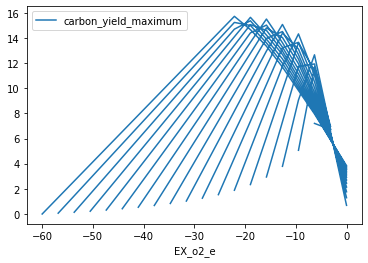

In [31]:
%matplotlib inline
prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');

Si especificamos la fuente de carbono, también podemos obtener el rendimiento de carbono y masa. Por ejemplo, estableciendo temporalmente el objetivo para producir acetato en su lugar, podríamos obtener el análisis de FFP de la siguiente manera:

In [32]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e")

In [33]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,0.0,0.000000,0.000000,0.000000,-60.000000
1,EX_glc__D_e,0.0,0.0,0.0,1.578947,0.052632,0.051748,-56.842105
2,EX_glc__D_e,0.0,0.0,0.0,3.157895,0.105263,0.103496,-53.684211
3,EX_glc__D_e,0.0,0.0,0.0,4.736842,0.157895,0.155245,-50.526316
4,EX_glc__D_e,0.0,0.0,0.0,6.315789,0.210526,0.206993,-47.368421


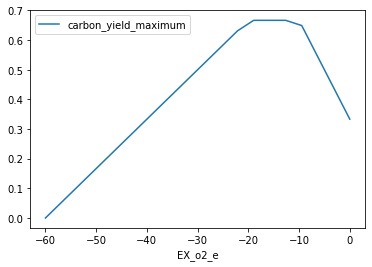

In [35]:
%matplotlib inline
prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');